# Exploratory Data Analysis

Chapter 3

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from distribution import Pmf, Cdf

## Loading 


In [39]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')

CPU times: user 4 ms, sys: 8 ms, total: 12 ms
Wall time: 14.1 ms


In [40]:
brfss.shape

(100000, 9)

In [41]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [42]:
brfss.describe()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
count,99938.000000,95143.000000,93404.000000,83447.000000,100000.000000,98794.000000,87713.000000,95143.000000,98794.000000
mean,1.513809,170.090443,81.202017,5.788656,2785.881001,6.103296,1.926845,163.915369,47.720732
std,0.499812,10.795080,20.945679,2.229189,3982.612684,3.601652,1.290404,11.297379,18.873769
min,1.000000,91.000000,23.130000,1.000000,5.774036,1.000000,0.000000,90.000000,21.000000
25%,1.000000,163.000000,66.220000,4.000000,579.932564,3.000000,1.140000,160.000000,32.000000
50%,2.000000,170.000000,78.930000,6.000000,1378.138470,6.000000,1.700000,160.000000,47.000000
75%,2.000000,178.000000,90.720000,8.000000,3202.380370,9.000000,2.410000,170.000000,62.000000
max,2.000000,226.000000,272.610000,8.000000,45053.592700,13.000000,15.000000,220.000000,89.500000


Text(0.5, 0, 'Height (cm)')

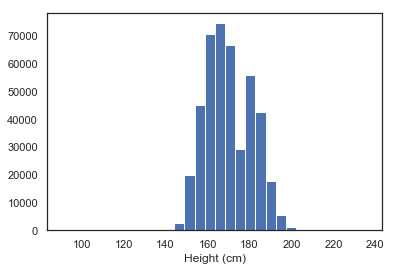

In [43]:
plt.hist(height.dropna(), bins=30)
plt.xlabel('Height (cm)')

In [44]:
short = brfss.HTM4<120
brfss[short]

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
297729,1.0,105.0,54.43,3.0,4307.570360,3.0,0.53,100.0,32.0
350597,2.0,105.0,63.50,NaN,158.108332,7.0,0.20,100.0,52.0
112220,2.0,105.0,77.11,4.0,2780.869330,4.0,0.37,100.0,37.0
386945,2.0,105.0,48.99,2.0,6249.133540,12.0,0.06,100.0,77.0
387626,1.0,105.0,92.53,1.0,2414.191940,9.0,3.00,100.0,62.0
384728,2.0,110.0,63.50,5.0,1363.372400,1.0,0.65,100.0,21.0
295218,2.0,104.0,79.38,1.0,1798.243170,3.0,1.89,100.0,32.0
384489,2.0,94.0,70.76,5.0,1247.899020,10.0,NaN,90.0,67.0
297729,1.0,105.0,54.43,3.0,4307.570360,3.0,0.53,100.0,32.0
385478,2.0,91.0,49.90,1.0,3177.585440,1.0,3.17,90.0,21.0


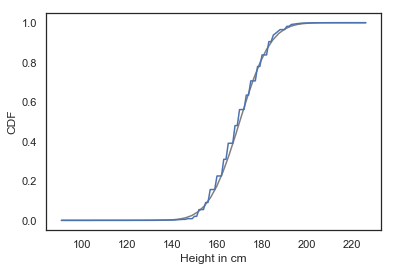

In [45]:
from distribution import Cdf
from scipy.stats import norm

# Extract height
height = brfss['HTM4']

# Make a norm object
dist = norm(height.mean(), height.std())

# Plot the model CDF
xs = np.linspace(height.min(), height.max())
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray')

# Plot the data CDF
Cdf(height).plot()
    
# Label the axes
plt.xlabel('Height in cm')
plt.ylabel('CDF')

plt.savefig('figs/height_cdf')

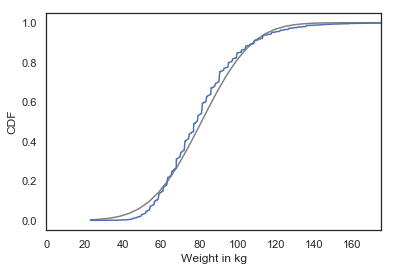

In [46]:
from distribution import Pmf, Cdf
from scipy.stats import norm

# Extract weight and compute its log
weight = brfss['WTKG3']

# Make a norm object
dist = norm(weight.mean(), weight.std())

# Plot the model CDF
xs = np.linspace(weight.min(), weight.max())
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray')

# Plot the data CDF
Cdf(weight).plot()
    
# Label the axes
plt.xlabel('Weight in kg')
plt.ylabel('CDF')
plt.xlim([0, 175])

plt.savefig('figs/weight_cdf')

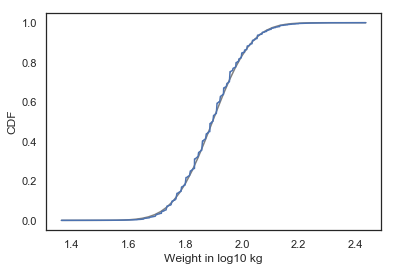

In [47]:
from distribution import Pmf, Cdf
from scipy.stats import norm

# Extract weight and compute its log
log_weight = np.log10(brfss['WTKG3'])

# Make a norm object
dist = norm(log_weight.mean(), log_weight.std())

# Plot the model CDF
xs = np.linspace(log_weight.min(), log_weight.max())
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray')

# Plot the data CDF
Cdf(log_weight).plot()
    
# Label the axes
plt.xlabel('Weight in log10 kg')
plt.ylabel('CDF')

plt.savefig('figs/log_weight_cdf')

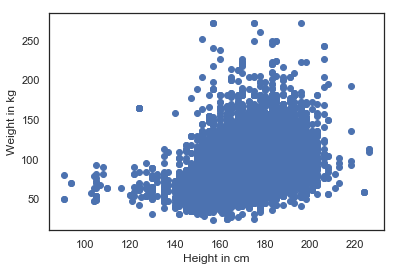

In [48]:
plt.plot(height, weight, 'o')

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter1.png')

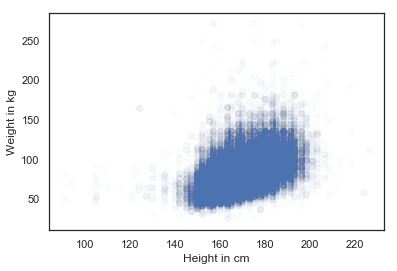

In [49]:
plt.plot(height, weight, 'o', alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter2.png')

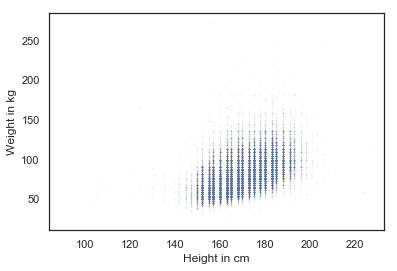

In [50]:
plt.plot(height, weight, 'o', markersize=1, alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter3.png')

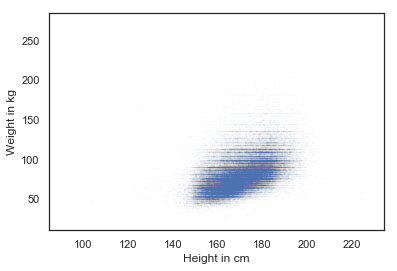

In [51]:
height_jitter = height + np.random.normal(0, 2, size=len(height))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter4.png')

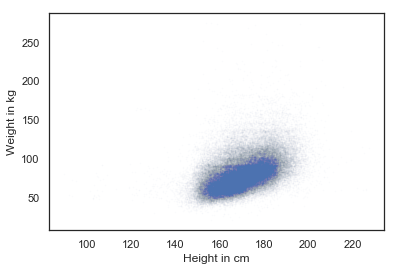

In [52]:
height_jitter = height + np.random.normal(0, 2, size=len(height))
weight_jitter = weight + np.random.normal(0, 2, size=len(weight))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter5.png')

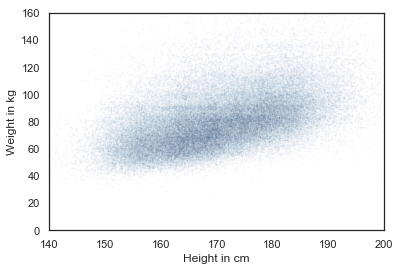

In [53]:
height_jitter = height + np.random.normal(0, 2, size=len(height))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter6.png')

In [54]:
from scipy.stats import linregress

subset = brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']

res = linregress(xs, ys)
res


LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998)

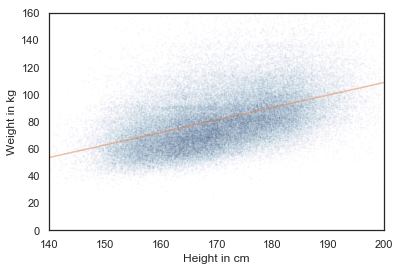

In [55]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

plt.plot(fx, fy, '-', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.axis([140, 200, 0, 160])
plt.savefig('figs/height_weight_reg1.png')

Text(0, 0.5, 'Weight in kg')

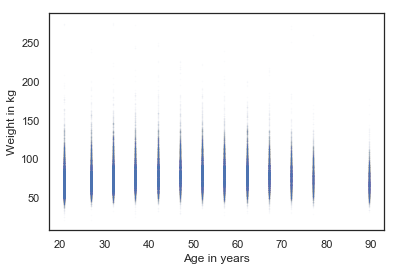

In [56]:
age = brfss['AGE']
plt.plot(age, weight_jitter, 'o', markersize=1, alpha=0.01)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

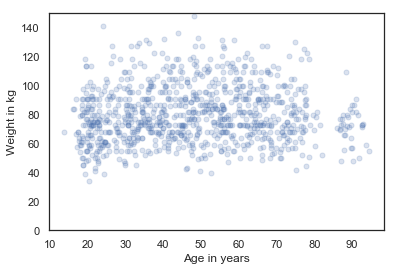

In [57]:
subset = brfss[:1000]

age = subset['AGE'] + np.random.normal(0, 2.5, size=len(subset))
weight = subset['WTKG3']
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.ylim([0,150])
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.savefig('figs/age_weight_scatter1.png')

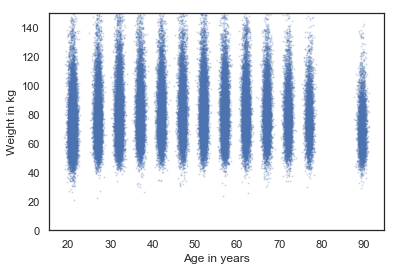

In [58]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)

plt.ylim([0,150])
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.savefig('figs/age_weight_scatter2.png')

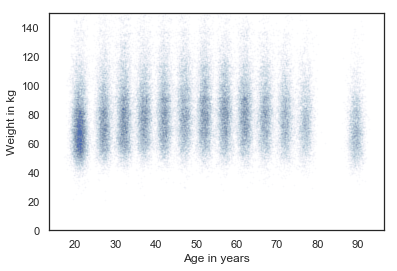

In [59]:
age = brfss['AGE']
age_jitter = age + np.random.normal(0, 1, len(age))
plt.scatter(age_jitter, weight_jitter, s=1, alpha=0.02)

plt.ylim([0, 150])
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.savefig('figs/age_weight_scatter3.png')

In [60]:
from scipy.stats import linregress

subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']

res = linregress(xs, ys)
res


LinregressResult(slope=0.023981159566968724, intercept=80.07977583683224, rvalue=0.021641432889064068, pvalue=4.374327493007566e-11, stderr=0.003638139410742186)

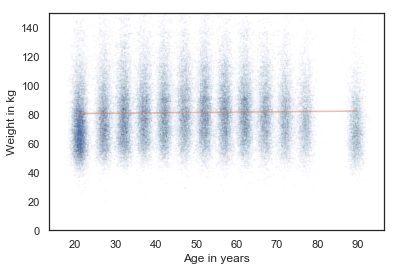

In [61]:

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

plt.plot(age_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

plt.plot(fx, fy, '-', alpha=0.5)
plt.ylim([0, 150])
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_age_reg1.png')

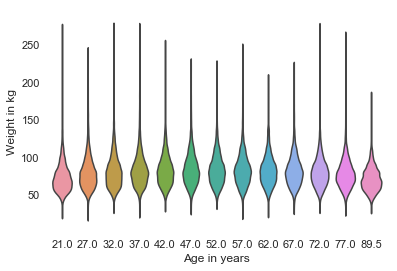

In [62]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])

sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)

sns.despine(left=True, bottom=True)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.savefig('figs/age_weight_violin.png')

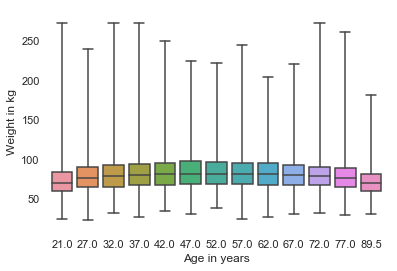

In [63]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

sns.despine(left=True, bottom=True)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.savefig('figs/age_weight_boxplot.png')

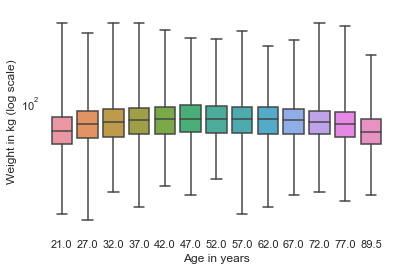

In [64]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')

sns.despine(left=True, bottom=True)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg (log scale)')

plt.savefig('figs/age_weight_boxplot2.png')

In [65]:
grouped = brfss.groupby('AGE')

for name, group in grouped['WTKG3']:
    print(name, len(group))

21.0 12566
27.0 8116
32.0 9321
37.0 8067
42.0 8039
47.0 7284
52.0 8652
57.0 8200
62.0 8182
67.0 6583
72.0 5365
77.0 4053
89.5 4366


In [66]:
ps = np.array([95, 75, 50, 25, 5])

for name, group in grouped['WTKG3']:
    percentiles = Cdf(group).percentile(ps)
    print(name, percentiles)

21.0 [108.86  83.91  70.31  59.87  49.9 ]
27.0 [117.93  90.72  77.11  65.    52.62]
32.0 [122.47  92.99  79.38  65.77  54.43]
37.0 [122.47  94.35  80.74  68.04  56.25]
42.0 [122.47  95.25  81.65  68.04  55.34]
47.0 [124.74  97.52  81.65  69.4   55.79]
52.0 [123.38  96.62  81.65  68.95  55.79]
57.0 [117.93  95.25  81.65  68.49  54.43]
62.0 [122.47  95.25  81.65  68.04  54.43]
67.0 [117.93  92.99  80.74  68.04  54.43]
72.0 [113.4   90.72  79.38  68.04  53.52]
77.0 [111.13  89.81  77.11  65.77  52.16]
89.5 [99.79 81.65 70.31 59.87 49.44]


In [67]:
res = []
for name, group in grouped['WTKG3']:
    percentiles = Cdf(group).percentile(ps)
    res.append(percentiles)

In [68]:
xs = grouped.groups.keys()
xs

dict_keys([21.0, 27.0, 32.0, 37.0, 42.0, 47.0, 52.0, 57.0, 62.0, 67.0, 72.0, 77.0, 89.5])

In [69]:
rows = np.transpose(res)

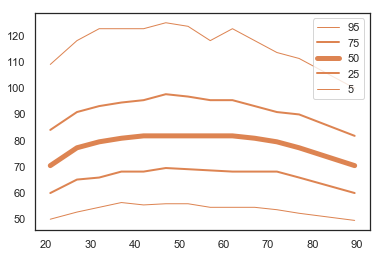

In [70]:
width = [1,2,5,2,1]

for i, qs in enumerate(rows):
    plt.plot(xs, qs, label=ps[i], linewidth=width[i], color='C1')
    
plt.legend()

Text(0, 0.5, 'Weight in kg')

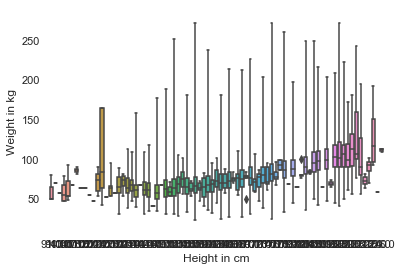

In [71]:
sns.boxplot(x='HTM4', y='WTKG3', data=data, whis=10)

sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')


Text(0, 0.5, 'Weight in kg')

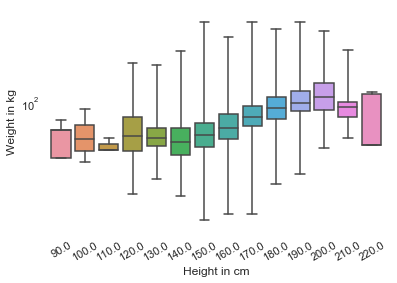

In [72]:
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.xticks(rotation=30)

sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Weight in kg')

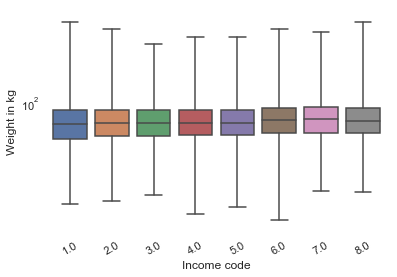

In [73]:
data['_AGEG5YR']
sns.boxplot(x='INCOME2', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.xticks(rotation=30)

sns.despine(left=True, bottom=True)
plt.xlabel('Income code')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Height in cm')

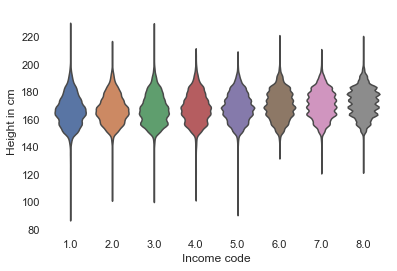

In [74]:
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

sns.despine(left=True, bottom=True)
plt.xlabel('Income code')
plt.ylabel('Height in cm')

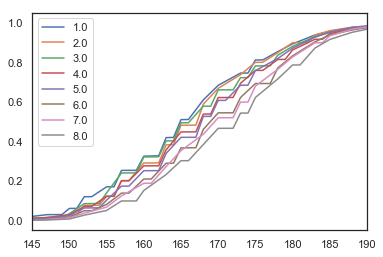

In [75]:
for name, group in brfss.groupby('INCOME2'):
    Cdf(group['HTM4']).plot(label=name)
    
plt.xlim([145, 190])
plt.legend()

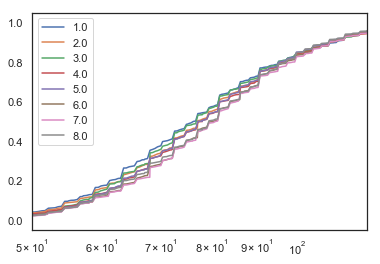

In [76]:
for name, group in brfss.groupby('INCOME2'):
    Cdf(group['WTKG3']).plot(label=name)
    
plt.xscale('log')
plt.xlim([50, 120])
plt.legend()

In [77]:
subset = brfss[['HTM4', 'WTKG3', 'AGE']]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


In [78]:
subset = brfss[['_AGEG5YR', 'INCOME2', '_VEGESU1']]
subset.corr()

,_AGEG5YR,INCOME2,_VEGESU1
_AGEG5YR,1.000000,-0.011048,-0.010526
INCOME2,-0.011048,1.000000,0.119670
_VEGESU1,-0.010526,0.119670,1.000000


Text(0, 0.5, 'Vegetable servings per day')

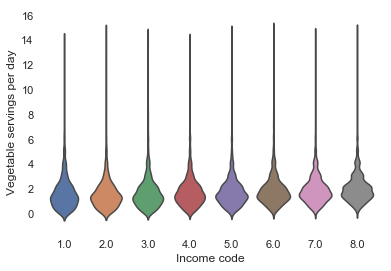

In [79]:
sns.violinplot(x='INCOME2', y='_VEGESU1', data=subset, inner=None)

sns.despine(left=True, bottom=True)
plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')

In [80]:
from scipy.stats import linregress

subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

res = linregress(xs, ys)
res

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305)

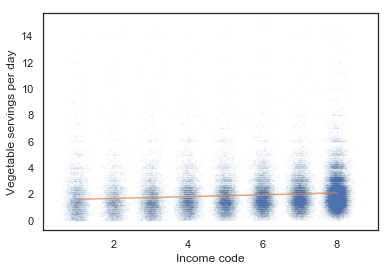

In [81]:
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', markersize=1, alpha=0.02)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

plt.plot(fx, fy, '-', alpha=0.7)

plt.savefig('figs/veggie_income_reg1.png')


Text(0, 0.5, 'Age (years)')

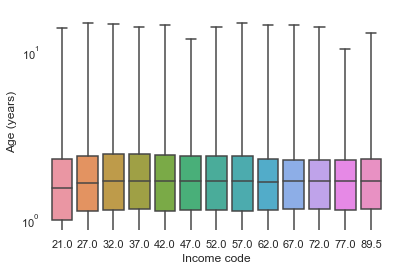

In [83]:
sns.boxplot(x='AGE', y='_VEGESU1', data=subset, whis=15)
plt.yscale('log')
sns.despine(left=True, bottom=True)
plt.xlabel('Income code')
plt.ylabel('Age (years)')

In [84]:
brfss['LOGWT'] = np.log10(brfss['WTKG3'])
subset = brfss[['HTM4', 'LOGWT', 'AGE']]
subset.corr()

,HTM4,LOGWT,AGE
HTM4,1.000000,0.500937,-0.093684
LOGWT,0.500937,1.000000,0.030140
AGE,-0.093684,0.030140,1.000000


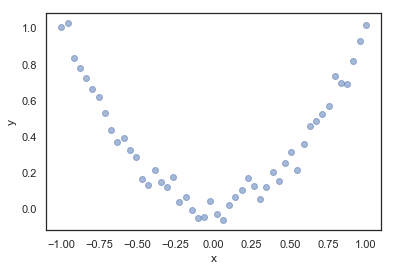

In [85]:
np.random.seed(18)
xs = np.linspace(-1, 1)
ys = xs**2 + np.random.normal(0, 0.05, len(xs))

plt.plot(xs, ys, 'o', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('figs/nonlinear.png')

In [86]:
def label_rho(ax, rho):
    label = 'ρ = %0.2f' % rho
    plt.text(0.05, 0.95, label, 
             horizontalalignment='left', 
             verticalalignment='top', 
             transform=ax.transAxes,
             fontsize=12)

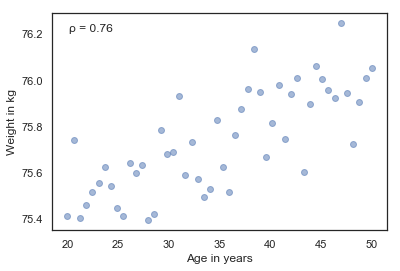

In [87]:
np.random.seed(18)
xs = np.linspace(20, 50)
ys = 75 + 0.02 * xs + np.random.normal(0, 0.15, len(xs))

plt.plot(xs, ys, 'o', alpha=0.5)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

rho = np.corrcoef(xs, ys)[0][1]
label_rho(plt.gca(), rho)

plt.savefig('figs/age_weight_corr1')

In [88]:
from scipy.stats import linregress
        
res = linregress(xs, ys)
res

LinregressResult(slope=0.018821034903244386, intercept=75.08049023710964, rvalue=0.7579660563439402, pvalue=1.8470158725246148e-10, stderr=0.002337849260560818)

In [89]:
def label_slope(ax, slope):
    label = 'm = %0.3f' % slope
    plt.text(0.05, 0.95, label, 
             horizontalalignment='left', 
             verticalalignment='top', 
             transform=ax.transAxes,
             fontsize=12)

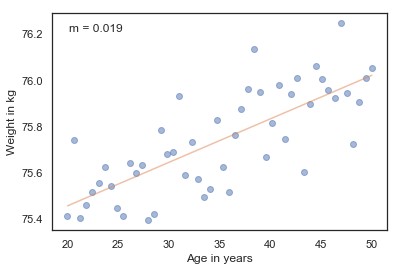

In [90]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

plt.plot(xs, ys, 'o', alpha=0.5)
plt.plot(fx, fy, '-', alpha=0.5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

label_slope(plt.gca(), res.slope)
#plt.ylim((66.62157782752605, 81.25696583110674))

plt.savefig('figs/age_weight_reg1')

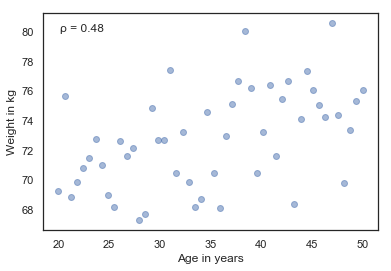

In [91]:
np.random.seed(18)
xs = np.linspace(20, 50)
ys = 65 + 0.2 * xs + np.random.normal(0, 3, len(xs))

plt.plot(xs, ys, 'o', alpha=0.5)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

rho = np.corrcoef(xs, ys)[0][1]
label_rho(plt.gca(), rho)

plt.savefig('figs/age_weight_corr2')

In [92]:
res = linregress(xs, ys)
res

LinregressResult(slope=0.17642069806488855, intercept=66.60980474219305, rvalue=0.47827769765763173, pvalue=0.0004430600283776241, stderr=0.04675698521121631)

(66.62157782752605, 81.25696583110674)

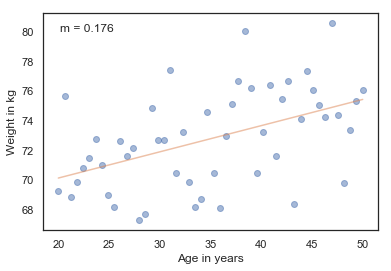

In [93]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

plt.plot(xs, ys, 'o', alpha=0.5)
plt.plot(fx, fy, '-', alpha=0.5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
label_slope(plt.gca(), res.slope)
plt.savefig('figs/age_weight_reg2')
            
plt.gca().get_ylim()

## Correlation calibration

In [94]:
def gen_corr(rho):
    means = [0, 0]
    covs = [[1, rho], [rho, 1]]
    m = np.random.multivariate_normal(means, covs, 100)
    return np.transpose(m)

In [95]:
def plot_scatter(rho, seed=1):
    np.random.seed(seed)
    xs, ys = gen_corr(rho)
    rho = np.corrcoef(xs, ys)[0][1]

    plt.plot(xs, ys, 'o', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    ax = plt.gca()
    label_rho(ax, rho)
    
    return xs, ys

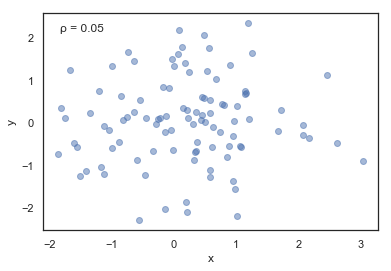

In [96]:
res = []
xs, ys = plot_scatter(0, seed=18)
res.append((xs, ys))

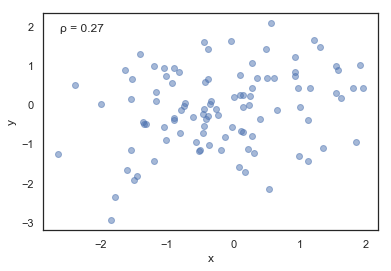

In [97]:
xs, ys = plot_scatter(0.25, seed=18)
res.append((xs, ys))

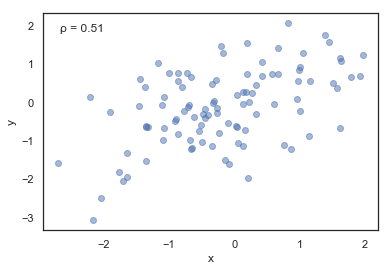

In [98]:
xs, ys = plot_scatter(0.5, seed=18)
res.append((xs, ys))

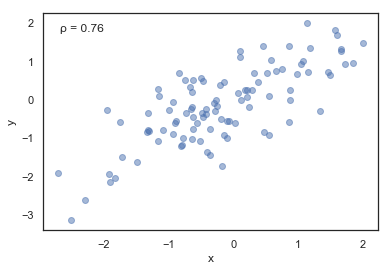

In [99]:
xs, ys = plot_scatter(0.75, seed=18)
res.append((xs, ys))

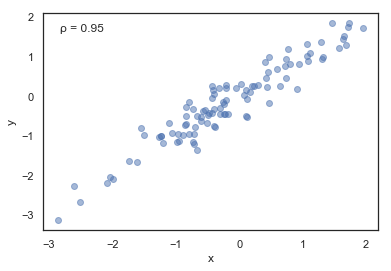

In [100]:
xs, ys = plot_scatter(0.95, seed=18)
res.append((xs, ys))

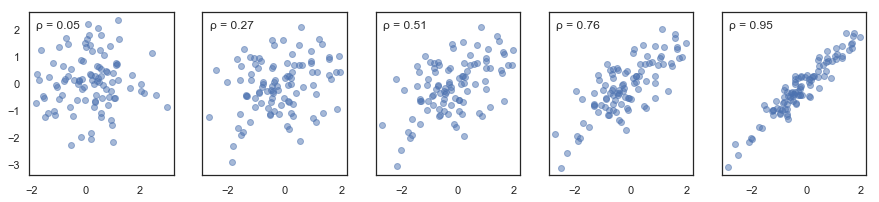

In [101]:
fig, axes = plt.subplots(ncols=5, sharey=True, figsize=(15,3)) 

for ax, (xs, ys) in zip(axes, res):
    ax.plot(xs, ys, 'o', alpha=0.5)
    rho = np.corrcoef(xs, ys)[0][1]
    label_rho(ax, rho)